# Descriptive Statistic

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [29]:
#load dataset 
df = pd.read_csv('monthly_house_rent.csv')

In [30]:
#define the row and column of our dataset 
df.shape

(30, 4)

In [31]:
#rename columns for convenience 
df.columns = ["Age", "Rent", "Water", "Electricity"]

# Compute housing cost 

In [32]:
# Compute main variable X
df["Housing_Cost"] = df["Rent"] + df["Water"] + df["Electricity"]

In [33]:
# Check the result
df[["Age", "Housing_Cost"]]

,Age,Housing_Cost
0,20,68.00
1,19,24.00
2,20,56.00
3,20,150.00
4,20,53.50
5,21,152.50
6,20,87.00
7,19,114.50
8,20,98.00
9,20,55.50


In [34]:
df[["Age", "Housing_Cost"]].to_csv("student_housing_cost.csv", index=False)

# Graphs

### Histogram

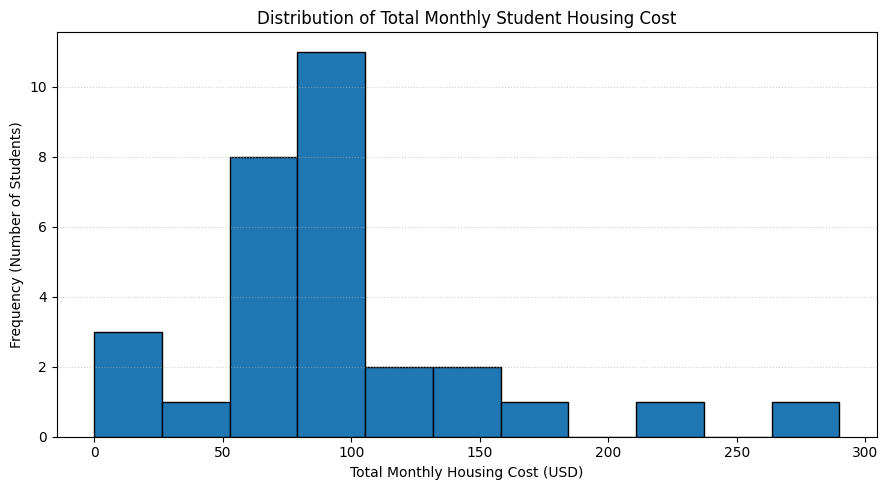

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

plt.hist(
    df["Housing_Cost"],
    bins="auto",
    edgecolor="black",
    linewidth=1
)

plt.xlabel("Total Monthly Housing Cost (USD)")
plt.ylabel("Frequency (Number of Students)")
plt.title("Distribution of Total Monthly Student Housing Cost")

plt.grid(axis="y", linestyle=":", alpha=0.6)
plt.tight_layout()
plt.show()


### Boxplot

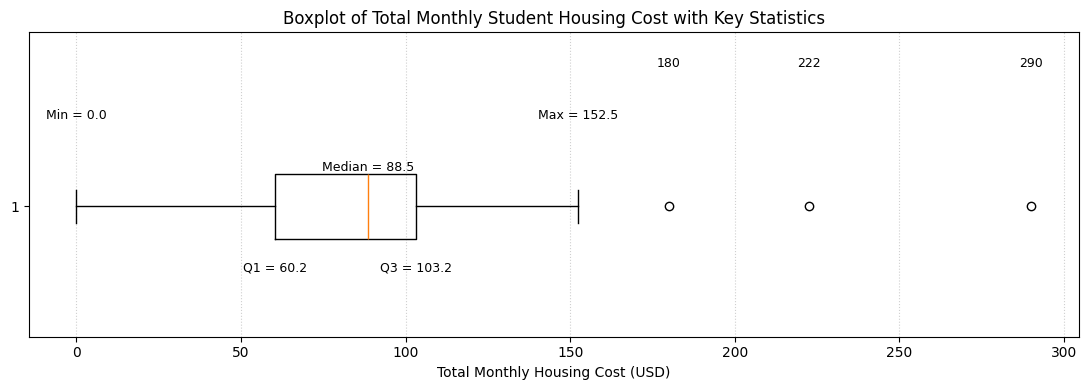

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = df["Housing_Cost"]

# Statistics
Q1 = np.percentile(x, 25)
median = np.median(x)
Q3 = np.percentile(x, 75)
IQR = Q3 - Q1

lower_whisker = x[x >= Q1 - 1.5 * IQR].min()
upper_whisker = x[x <= Q3 + 1.5 * IQR].max()
outliers = x[(x < lower_whisker) | (x > upper_whisker)]

# Plot
plt.figure(figsize=(11, 4))
plt.boxplot(x, vert=False, showfliers=True)

plt.xlabel("Total Monthly Housing Cost (USD)")
plt.title("Boxplot of Total Monthly Student Housing Cost with Key Statistics")
plt.grid(axis="x", linestyle=":", alpha=0.6)

# ---- Annotations (COMPACT & BALANCED) ----
# Quartiles (below box)
plt.text(Q1, 0.85, f"Q1 = {Q1:.1f}", ha="center", fontsize=9)
plt.text(Q3, 0.85, f"Q3 = {Q3:.1f}", ha="center", fontsize=9)

# Median (slightly above box)
plt.text(median, 1.08, f"Median = {median:.1f}", ha="center", fontsize=9)

# Whiskers (just above)
plt.text(lower_whisker, 1.20, f"Min = {lower_whisker:.1f}", ha="center", fontsize=9)
plt.text(upper_whisker, 1.20, f"Max = {upper_whisker:.1f}", ha="center", fontsize=9)

# Outliers (slightly above whiskers)
for value in outliers:
    plt.text(value, 1.32, f"{int(value)}", ha="center", fontsize=9)

# Tight vertical limits
plt.ylim(0.7, 1.4)

plt.tight_layout()
plt.show()


## Numerical Description

In [37]:
df.describe()

,Age,Rent,Water,Electricity,Housing_Cost
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,19.533333,73.000000,8.166667,12.458333,93.625000
std,0.730297,52.630789,8.021881,11.671156,59.239751
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,50.000000,3.000000,5.000000,60.250000
50%,20.000000,65.000000,5.000000,10.000000,88.500000
75%,20.000000,88.750000,10.000000,18.750000,103.250000
max,21.000000,250.000000,30.000000,50.000000,290.000000


## Outlier Detection (IQR Rule)

In [38]:
X = df["Housing_Cost"]
n = len(X)
# Quartiles & IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# IQR fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers
outliers = X[(X < lower_fence) | (X > upper_fence)]

In [39]:
print(f"Lower fence: {lower_fence:.2f}")
print(f"Upper fence: {upper_fence:.2f}")

if outliers.empty:
    print("Outliers: None")
else:
    print("Outliers (Housing Cost in USD):")
    for value in outliers:
        print(f"- {value:.2f}")


Lower fence: -4.25
Upper fence: 167.75
Outliers (Housing Cost in USD):
- 290.00
- 222.50
- 180.00


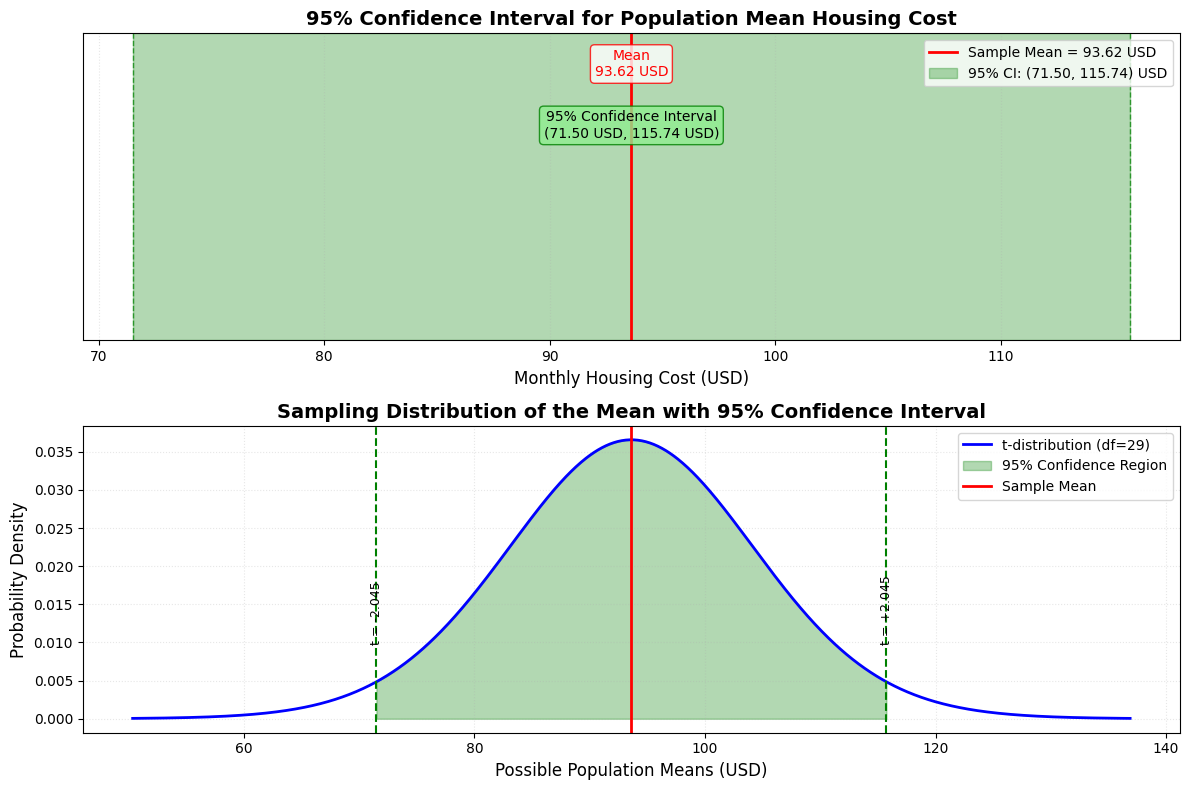

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


# Load the data if needed
df = pd.read_csv('monthly_house_rent.csv')
df.columns = ["Age", "Rent", "Water", "Electricity"]
df["Housing_Cost"] = df["Rent"] + df["Water"] + df["Electricity"]

# Your calculated values
sample_mean = 93.62
sample_std = 59.24
n = 30
t_critical = 2.045  # t(0.025, 29)

# Calculate margin of error and confidence interval
margin_of_error = t_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# Create visualization
plt.figure(figsize=(12, 8))

# Create subplot 1: Confidence Interval Visualization
plt.subplot(2, 1, 1)

# Plot the sample mean
plt.axvline(x=sample_mean, color='red', linestyle='-', linewidth=2, label=f'Sample Mean = {sample_mean:.2f} USD')

# Plot the confidence interval as a shaded region
plt.axvspan(ci_lower, ci_upper, alpha=0.3, color='green', label=f'95% CI: ({ci_lower:.2f}, {ci_upper:.2f}) USD')

# Add reference lines for the bounds
plt.axvline(x=ci_lower, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(x=ci_upper, color='green', linestyle='--', linewidth=1, alpha=0.7)

# Add text annotations
plt.text(sample_mean, 0.9, f'Mean\n{sample_mean:.2f} USD', 
         ha='center', va='center', fontsize=10, color='red',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="red", alpha=0.8))

plt.text((ci_lower + ci_upper)/2, 0.7, f'95% Confidence Interval\n({ci_lower:.2f} USD, {ci_upper:.2f} USD)', 
         ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", edgecolor="green", alpha=0.8))

# Formatting
plt.xlabel("Monthly Housing Cost (USD)", fontsize=12)
plt.title("95% Confidence Interval for Population Mean Housing Cost", fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.yticks([])  # Hide y-axis ticks
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

# Create subplot 2: Distribution with Confidence Interval
plt.subplot(2, 1, 2)

# Create a t-distribution visualization
df_t = n - 1  # degrees of freedom
x = np.linspace(sample_mean - 4*sample_std/np.sqrt(n), sample_mean + 4*sample_std/np.sqrt(n), 1000)
y = stats.t.pdf(x, df_t, loc=sample_mean, scale=sample_std/np.sqrt(n))

# Plot the t-distribution
plt.plot(x, y, 'b-', linewidth=2, label=f"t-distribution (df={df_t})")

# Shade the confidence region
x_ci = np.linspace(ci_lower, ci_upper, 100)
y_ci = stats.t.pdf(x_ci, df_t, loc=sample_mean, scale=sample_std/np.sqrt(n))
plt.fill_between(x_ci, y_ci, color='green', alpha=0.3, label='95% Confidence Region')

# Add vertical lines
plt.axvline(x=sample_mean, color='red', linestyle='-', linewidth=2, label=f'Sample Mean')
plt.axvline(x=ci_lower, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=ci_upper, color='green', linestyle='--', linewidth=1.5)

# Add critical t-values
t_lower = (ci_lower - sample_mean) / (sample_std/np.sqrt(n))
t_upper = (ci_upper - sample_mean) / (sample_std/np.sqrt(n))
plt.text(sample_mean + t_lower*(sample_std/np.sqrt(n)), 0.01, f't = -{t_critical:.3f}', 
         ha='center', fontsize=9, rotation=90)
plt.text(sample_mean + t_upper*(sample_std/np.sqrt(n)), 0.01, f't = +{t_critical:.3f}', 
         ha='center', fontsize=9, rotation=90)

# Formatting
plt.xlabel("Possible Population Means (USD)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Sampling Distribution of the Mean with 95% Confidence Interval", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()